In [1]:
from qiskit import QuantumCircuit
import math
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
import revlibparser

# import sys
# import os
# sys.path.append(os.path.abspath("/Users/anikeshparashar/revlib-to-qiskit"))
# from revlib2qiskit import *

In [2]:
# qc = QuantumCircuit(5)

# qc.cx(3,0)
# qc.h(1)
# qc.cx(4,1)
# qc.cx(0,2)
# qc.cx(1,0)
# qc.cx(0,3)
# qc.cx(3,2)
# qc.cx(3,1)
# qc.cx(0,1)
# qc.cx(0,4)
# qc.cx(4,3)

qc = revlibparser.read_circuit("./reals/3_17_15.real")

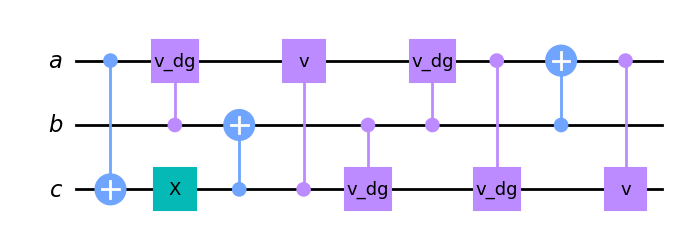

In [3]:
qc.draw(output = "mpl")

In [4]:
qc.num_qubits

3

In [5]:
index = {}
ind = 0
for i in qc.qubits:
    index[i] = ind
    ind += 1

In [6]:
index

{Qubit(QuantumRegister(1, 'a'), 0): 0,
 Qubit(QuantumRegister(1, 'b'), 0): 1,
 Qubit(QuantumRegister(1, 'c'), 0): 2}

In [7]:
qc.data

[CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'a'), 0), Qubit(QuantumRegister(1, 'c'), 0)), clbits=()), CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'c'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='cv_dg', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'b'), 0), Qubit(QuantumRegister(1, 'a'), 0)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'c'), 0), Qubit(QuantumRegister(1, 'b'), 0)), clbits=()), CircuitInstruction(operation=Instruction(name='cv', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'c'), 0), Qubit(QuantumRegister(1, 'a'), 0)), clbits=()), CircuitInstruction(operation=Instruction(name='cv_dg', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(Quantum

In [8]:
for gate in qc.data:
    print('\ngate name:', gate[0].name)
    print('qubit(s) acted on:', gate[1])
    print('other paramters (such as angles):', gate[0].params)


gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(1, 'a'), 0), Qubit(QuantumRegister(1, 'c'), 0)]
other paramters (such as angles): []

gate name: x
qubit(s) acted on: [Qubit(QuantumRegister(1, 'c'), 0)]
other paramters (such as angles): []

gate name: cv_dg
qubit(s) acted on: [Qubit(QuantumRegister(1, 'b'), 0), Qubit(QuantumRegister(1, 'a'), 0)]
other paramters (such as angles): []

gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(1, 'c'), 0), Qubit(QuantumRegister(1, 'b'), 0)]
other paramters (such as angles): []

gate name: cv
qubit(s) acted on: [Qubit(QuantumRegister(1, 'c'), 0), Qubit(QuantumRegister(1, 'a'), 0)]
other paramters (such as angles): []

gate name: cv_dg
qubit(s) acted on: [Qubit(QuantumRegister(1, 'b'), 0), Qubit(QuantumRegister(1, 'c'), 0)]
other paramters (such as angles): []

gate name: cv_dg
qubit(s) acted on: [Qubit(QuantumRegister(1, 'b'), 0), Qubit(QuantumRegister(1, 'a'), 0)]
other paramters (such as angles): []

gate name: cv_dg
qubit(s) acted 

In [9]:
gate[1][0]

Qubit(QuantumRegister(1, 'a'), 0)

In [10]:
index[gate[1][0]]

0

In [11]:
costing = [[None for i in range(5)] for j in range(len(qc.qubits))]

for i in range(len(qc.qubits)):
    costing[i][0] = qc.qubits[i]
    costing[i][1] = []
    costing[i][3] = []
    
time = 0
for gate in qc.data:
    if len(gate[1]) == 1:
        continue
    time = time+1
    costing[index[gate[1][0]]][1].append(time)
    costing[index[gate[1][1]]][1].append(time)
    if math.fabs(index[gate[1][0]]-index[gate[1][1]])!=1:
        costing[index[gate[1][0]]][3].append(time)
        costing[index[gate[1][1]]][3].append(time)

for i in range(len(qc.qubits)):
    costing[i][2] = sum(costing[i][1])
    costing[i][4] = sum(costing[i][3])

In [12]:
costing

[[Qubit(QuantumRegister(1, 'a'), 0),
  [1, 2, 4, 6, 7, 8, 9],
  37,
  [1, 4, 7, 9],
  21],
 [Qubit(QuantumRegister(1, 'b'), 0), [2, 3, 5, 6, 8], 24, [], 0],
 [Qubit(QuantumRegister(1, 'c'), 0), [1, 3, 4, 5, 7, 9], 29, [1, 4, 7, 9], 21]]

In [13]:
pref_table =[]
for i in costing:
    pref_table.append([])
    pref_table[-1].extend([i[0],i[2],i[4],i[4]/i[2]])

In [14]:
pref_table

[[Qubit(QuantumRegister(1, 'a'), 0), 37, 21, 0.5675675675675675],
 [Qubit(QuantumRegister(1, 'b'), 0), 24, 0, 0.0],
 [Qubit(QuantumRegister(1, 'c'), 0), 29, 21, 0.7241379310344828]]

In [15]:
def Sort(List):
    List.sort(reverse = True, key=lambda l: l[3])
    return List

sorted_pref_table = Sort(pref_table)

In [16]:
sorted_pref_table

[[Qubit(QuantumRegister(1, 'c'), 0), 29, 21, 0.7241379310344828],
 [Qubit(QuantumRegister(1, 'a'), 0), 37, 21, 0.5675675675675675],
 [Qubit(QuantumRegister(1, 'b'), 0), 24, 0, 0.0]]

In [17]:
lattice_size1 = lattice_size2 = math.ceil(math.sqrt(len(index)))

In [18]:
lattice_size1, lattice_size2

(2, 2)

In [19]:
grid_struct = [[None for i in range(lattice_size2)] for j in range(lattice_size1)]

In [20]:
def count_emp_neigh(grid_struct, i, j, M, N):
    count = 0
    if i>0 and grid_struct[i-1][j] is None:
        count = count+1
    if j>0 and grid_struct[i][j-1] is None:
        count = count+1
    if i<M-1 and grid_struct[i+1][j] is None:
        count = count+1
    if j<N-1 and grid_struct[i][j+1] is None:
        count = count+1
    return count

In [21]:
def max_emp_neigh(grid_struct, M, N):
    max = 0
    loc = [[]]
    for i in range(M):
        for j in range(N):
            if count_emp_neigh(grid_struct, i, j, M, N) > max and grid_struct[i][j] is None:
                max = count_emp_neigh(grid_struct, i, j, M, N)
                loc=[[i,j]]
            elif count_emp_neigh(grid_struct, i, j, M, N) == max and grid_struct[i][j] is None:
                loc.append([i,j])
    return loc

In [22]:
count = 1
prev=[None, None]
for q_dat in sorted_pref_table:
    if count==1:
        grid_struct[int(len(grid_struct)/2)][int(len(grid_struct[0])/2)] = q_dat[0]
        prev[0] = int(len(grid_struct)/2)
        prev[1] = int(len(grid_struct[0])/2)
        count = count+1
    else:
        loc = max_emp_neigh(grid_struct, lattice_size1, lattice_size2)
        if len(loc) == 1:
            grid_struct[loc[0][0]][loc[0][1]] = q_dat[0]
            prev[0] = loc[0][0]
            prev[1] = loc[0][1]
        else:
            i, j = prev
            assigned = False
            for a in [-1, 1, -2, 2]:
                if 0<=j+a<=lattice_size2-1 and grid_struct[i][j+a] is None:
                    grid_struct[i][j+a] = q_dat[0]
                    assigned = True
                    break
                if 0<=i+a<=lattice_size1-1 and grid_struct[i+a][j] is None:
                    grid_struct[i+a][j] = q_dat[0]
                    assigned = True
                    break
            if not assigned:    
                for a in range(0, lattice_size1):
                    for b in range(0, lattice_size2):
                        if 0<=i+a<=lattice_size1-1 and 0<=j+b<=lattice_size2-1 and grid_struct[i+a][j+b] is None:
                            grid_struct[i+a][j+b] = q_dat[0]
                            assigned = True
                            break
                        if 0<=i+a<=lattice_size1-1 and 0<=j-b<=lattice_size2-1 and grid_struct[i+a][j-b] is None:
                            grid_struct[i+a][j-b] = q_dat[0]
                            assigned = True
                            break
                        if 0<=i-a<=lattice_size1-1 and 0<=j+b<=lattice_size2-1 and grid_struct[i-a][j+b] is None:
                            grid_struct[i-a][j+b] = q_dat[0]
                            assigned = True
                            break
                        if 0<=i-a<=lattice_size1-1 and 0<=j-b<=lattice_size2-1 and grid_struct[i-a][j-b] is None:
                            grid_struct[i-a][j-b] = q_dat[0]
                            assigned = True
                            break
                    if (assigned):
                        break

In [23]:
grid_struct

[[Qubit(QuantumRegister(1, 'a'), 0), Qubit(QuantumRegister(1, 'b'), 0)],
 [None, Qubit(QuantumRegister(1, 'c'), 0)]]

In [24]:
import copy
intial_grid_struct = copy.deepcopy(grid_struct)

In [25]:
dict = {}
for i in range(lattice_size1):
    for j in range(lattice_size2):
        if grid_struct[i][j] is not None:
            dict[grid_struct[i][j]] = [i, j]

In [26]:
dict

{Qubit(QuantumRegister(1, 'a'), 0): [0, 0],
 Qubit(QuantumRegister(1, 'b'), 0): [0, 1],
 Qubit(QuantumRegister(1, 'c'), 0): [1, 1]}

In [27]:
def print_gs(grid_struct):
    for i in range(len(grid_struct)):
        for j in range(len(grid_struct[0])):
            if grid_struct[i][j] is None:
                print(' ', end=' ')
            else:
                print(index[grid_struct[i][j]], end=' ')
        print()

In [28]:
optimized_qc = QuantumCircuit(qc.num_qubits)

In [29]:
import time

In [30]:
print_gs(grid_struct)
swap_count = 0
print()
for gate in qc.data:
    if len(gate[1]) == 1:
        print("no swap")
        print_gs(grid_struct)
        print()
        print("Gate achieved: ",gate[0].name, index[gate[1][0]])
        print()
        continue
    l1_x, l1_y = dict[gate[1][0]]
    l2_x, l2_y = dict[gate[1][1]]
    
    if ((l1_x == l2_x) and (math.fabs(l1_y - l2_y) == 1)) or ((l1_y == l2_y) and (math.fabs(l1_x - l2_x) == 1)):
        print("no swap")
        print_gs(grid_struct)
        print()
        print("Gate achieved: ",gate[0].name, index[gate[1][0]], index[gate[1][1]])
        print()
    else:
        dx = l1_x - l2_x
        dy = l1_y - l2_y
        while (math.fabs(dx) + math.fabs(dy) != 1):
            if dx > 0 and grid_struct[l1_x - 1][l1_y] is not None:
                grid_struct[l1_x - 1][l1_y], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x - 1][l1_y]
                dict[grid_struct[l1_x - 1][l1_y]] = [l1_x - 1, l1_y]
                dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
            elif dx > 0 and  grid_struct[l2_x + 1][l2_y] is not None:
                grid_struct[l2_x + 1][l2_y], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x + 1][l2_y]
                dict[grid_struct[l2_x + 1][l2_y]] = [l2_x + 1, l2_y]
                dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
            elif dx < 0 and grid_struct[l1_x + 1][l1_y] is not None:
                grid_struct[l1_x + 1][l1_y], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x + 1][l1_y]
                dict[grid_struct[l1_x + 1][l1_y]] = [l1_x + 1, l1_y]
                dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
            elif dx < 0 and  grid_struct[l2_x - 1][l2_y] is not None:
                grid_struct[l2_x - 1][l2_y], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x - 1][l2_y]
                dict[grid_struct[l2_x - 1][l2_y]] = [l2_x - 1, l2_y]
                dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
            elif dy > 0 and grid_struct[l1_x][l1_y - 1] is not None:
                grid_struct[l1_x][l1_y - 1], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x][l1_y - 1]
                dict[grid_struct[l1_x][l1_y - 1]] = [l1_x, l1_y - 1]
                dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
            elif dy > 0 and  grid_struct[l2_x][l2_y + 1] is not None:
                grid_struct[l2_x][l2_y + 1], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x][l2_y + 1]
                dict[grid_struct[l2_x][l2_y + 1]] = [l2_x, l2_y + 1]
                dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
            elif dy < 0 and grid_struct[l1_x][l1_y + 1] is not None:
                grid_struct[l1_x][l1_y + 1], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x][l1_y + 1]
                dict[grid_struct[l1_x][l1_y + 1]] = [l1_x, l1_y + 1]
                dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
            elif dy < 0 and  grid_struct[l2_x][l2_y - 1] is not None:
                grid_struct[l2_x][l2_y - 1], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x][l2_y - 1]
                dict[grid_struct[l2_x][l2_y - 1]] = [l2_x, l2_y - 1]
                dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
            l1_x, l1_y = dict[gate[1][0]]
            l2_x, l2_y = dict[gate[1][1]]
            dx = l1_x - l2_x
            dy = l1_y - l2_y
            print(dx)
            print(dy)
#             print("reqd", gate[0].name, index[gate[1][0]], index[gate[1][1]])
            print("swap")
            swap_count += 1
            print_gs(grid_struct)
            print()
#             time.sleep(1)
        print("Gate achieved: ",gate[0].name, index[gate[1][0]], index[gate[1][1]])
        print()

0 1 
  2 

0
-1
swap
0 2 
  1 

Gate achieved:  cx 0 2

no swap
0 2 
  1 

Gate achieved:  x 2

0
1
swap
0 1 
  2 

Gate achieved:  cv_dg 1 0

no swap
0 1 
  2 

Gate achieved:  cx 2 1

0
1
swap
0 2 
  1 

Gate achieved:  cv 2 0

no swap
0 2 
  1 

Gate achieved:  cv_dg 1 2

0
1
swap
0 1 
  2 

Gate achieved:  cv_dg 1 0

0
-1
swap
0 2 
  1 

Gate achieved:  cv_dg 0 2

0
1
swap
0 1 
  2 

Gate achieved:  cx 1 0

0
-1
swap
0 2 
  1 

Gate achieved:  cv 0 2



In [31]:
print(swap_count)

7


In [32]:
import tabulate

In [33]:
print(tabulate.tabulate([["Qubits", "Time Instants", "Total Interation", "Time Instants", "Total Costing"]]+costing,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════════════╤═══════════════════════╤════════════════════╤═════════════════╤═════════════════╕
│ Qubits                            │ Time Instants         │   Total Interation │ Time Instants   │   Total Costing │
╞═══════════════════════════════════╪═══════════════════════╪════════════════════╪═════════════════╪═════════════════╡
│ Qubit(QuantumRegister(1, 'a'), 0) │ [1, 2, 4, 6, 7, 8, 9] │                 37 │ [1, 4, 7, 9]    │              21 │
├───────────────────────────────────┼───────────────────────┼────────────────────┼─────────────────┼─────────────────┤
│ Qubit(QuantumRegister(1, 'b'), 0) │ [2, 3, 5, 6, 8]       │                 24 │ []              │               0 │
├───────────────────────────────────┼───────────────────────┼────────────────────┼─────────────────┼─────────────────┤
│ Qubit(QuantumRegister(1, 'c'), 0) │ [1, 3, 4, 5, 7, 9]    │                 29 │ [1, 4, 7, 9]    │              21 │
╘═══════════════════════════════════╧═══════════

In [34]:
print(tabulate.tabulate([["Qubits", "Total Interation", "Total Costing", "Preference Index"]]+pref_table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════════════╤════════════════════╤═════════════════╤════════════════════╕
│ Qubits                            │   Total Interation │   Total Costing │   Preference Index │
╞═══════════════════════════════════╪════════════════════╪═════════════════╪════════════════════╡
│ Qubit(QuantumRegister(1, 'c'), 0) │                 29 │              21 │           0.724138 │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(1, 'a'), 0) │                 37 │              21 │           0.567568 │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(1, 'b'), 0) │                 24 │               0 │           0        │
╘═══════════════════════════════════╧════════════════════╧═════════════════╧════════════════════╛


In [35]:
print(tabulate.tabulate([["Qubits", "Total Interation", "Total Costing", "Preference Index"]]+sorted_pref_table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════════════╤════════════════════╤═════════════════╤════════════════════╕
│ Qubits                            │   Total Interation │   Total Costing │   Preference Index │
╞═══════════════════════════════════╪════════════════════╪═════════════════╪════════════════════╡
│ Qubit(QuantumRegister(1, 'c'), 0) │                 29 │              21 │           0.724138 │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(1, 'a'), 0) │                 37 │              21 │           0.567568 │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(1, 'b'), 0) │                 24 │               0 │           0        │
╘═══════════════════════════════════╧════════════════════╧═════════════════╧════════════════════╛


In [36]:
print(tabulate.tabulate(intial_grid_struct,tablefmt='fancy_grid'))

╒═══════════════════════════════════╤═══════════════════════════════════╕
│ Qubit(QuantumRegister(1, 'a'), 0) │ Qubit(QuantumRegister(1, 'b'), 0) │
├───────────────────────────────────┼───────────────────────────────────┤
│                                   │ Qubit(QuantumRegister(1, 'c'), 0) │
╘═══════════════════════════════════╧═══════════════════════════════════╛
